# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [214]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [215]:
sinasc = pd.read_csv('sinasc_RO_2019.csv')
sinasc.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [216]:
sinasc.loc[sinasc['APGAR5'] >= 8, 'APGAR5 CAT'] = 'Normal'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <= 7), 'APGAR5 CAT'] = 'Asfixia Leve'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <= 5), 'APGAR5 CAT'] = 'Asfixia Moderada'
sinasc.loc[(sinasc['APGAR5'] >= 0) & (sinasc['APGAR5'] <= 3), 'APGAR5 CAT'] = 'Asfixia Severa'

sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,APGAR5 CAT
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,Normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,Normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [217]:
sinasc['GESTACAO'] = sinasc['GESTACAO'].str.replace('semanas', '')

<Axes: xlabel='GESTACAO', ylabel='APGAR5'>

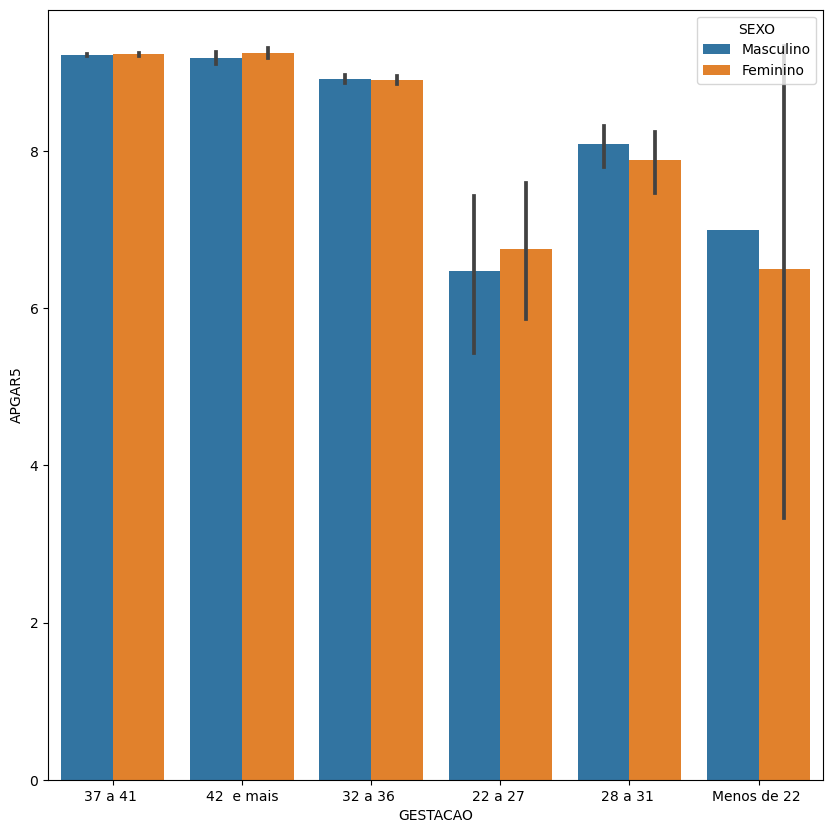

In [218]:
plt.figure(figsize = (10, 10))
sns.barplot(x = 'GESTACAO', y = 'APGAR5', hue = 'SEXO', data = sinasc)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [219]:
tabela_ges_apgar5 = pd.crosstab(sinasc['GESTACAO'], sinasc['APGAR5 CAT'])
tabela_ges_apgar5

APGAR5 CAT,Asfixia Leve,Asfixia Moderada,Asfixia Severa,Normal
GESTACAO,,,,
22 a 27,12,1,21,51
28 a 31,18,12,3,129
32 a 36,73,19,8,2134
37 a 41,196,28,33,22266
42 e mais,6,1,1,690
Menos de 22,1,0,2,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [220]:
porcen_ges_apgar5_formatado = tabela_ges_apgar5.apply(lambda r: r/r.sum(), axis=1) * 100
print (f'{porcen_ges_apgar5_formatado}')
print ('-' * 90)
print (f'A soma das porcentagem de cada linha é :\n {porcen_ges_apgar5_formatado.sum(axis=1)}')

APGAR5 CAT    Asfixia Leve  Asfixia Moderada  Asfixia Severa     Normal
GESTACAO                                                               
22 a 27          14.117647          1.176471       24.705882  60.000000
28 a 31          11.111111          7.407407        1.851852  79.629630
32 a 36           3.267681          0.850492        0.358102  95.523724
37 a 41           0.870222          0.124317        0.146517  98.858944
42  e mais        0.859599          0.143266        0.143266  98.853868
Menos de 22      14.285714          0.000000       28.571429  57.142857
------------------------------------------------------------------------------------------
A soma das porcentagem de cada linha é :
 GESTACAO
22 a 27         100.0
28 a 31         100.0
32 a 36         100.0
37 a 41         100.0
42  e mais      100.0
Menos de 22     100.0
dtype: float64


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

Observando o gráfico abaixo, é possível concluir que o índice de asfixia em bebês começa a crescer para gestações com menos de 37 semanas. Nota-se que, especificamente para gestações com menos de 22 semanas, há o maior índice de asfixia severa.

<Axes: xlabel='GESTACAO'>

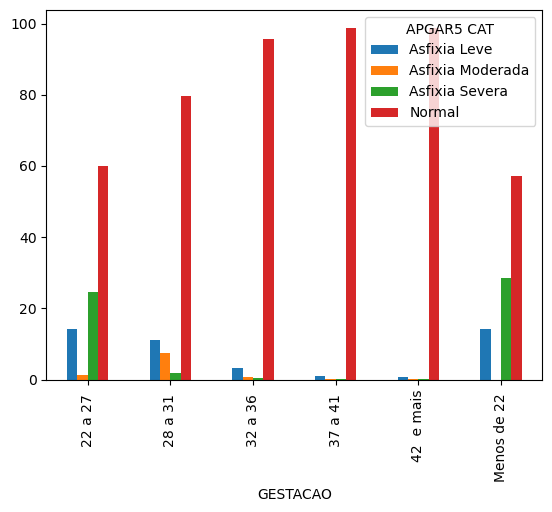

In [221]:
porcen_ges_apgar5_formatado.plot.bar()

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

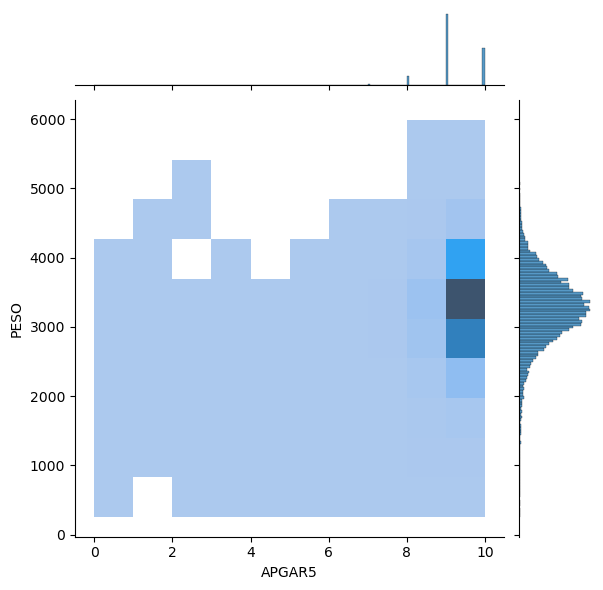

In [222]:
sns.jointplot(x = 'APGAR5'
                , y = 'PESO'
                , data = sinasc
                , kind = 'hist'
                , bins = [10 ,10])
plt.show()

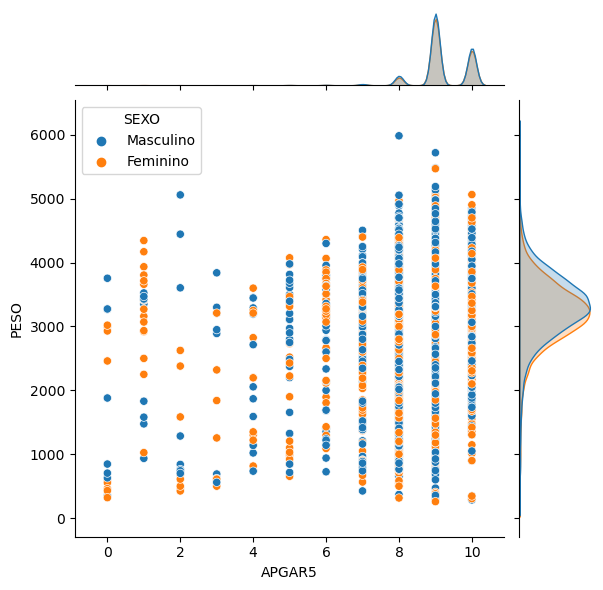

In [225]:
sns.jointplot(data = sinasc, x = 'APGAR5', y = 'PESO', hue = 'SEXO')

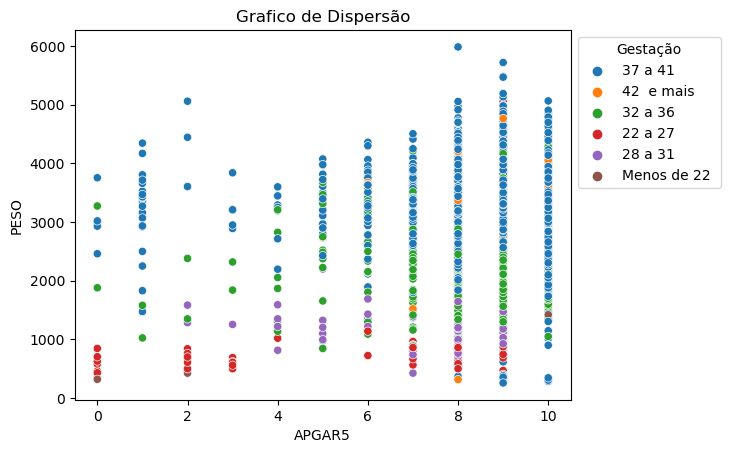

In [224]:
sns.scatterplot(data = sinasc, x = 'APGAR5', y = 'PESO', hue = 'GESTACAO')
plt.title('Grafico de Dispersão', fontsize = 12)
plt.legend(title='Gestação', bbox_to_anchor=(1, 1), loc='best')